# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

<Axes: xlabel='Edad', ylabel='Retrasos'>

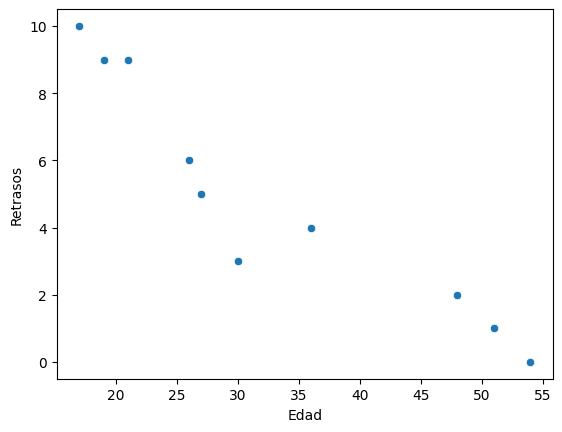

In [3]:
sns.scatterplot(data=student_data, x='Edad', y='Retrasos')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Podemos ver que cuanto más jovenes, si que hay mayor cantidad de retrasos.  

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [4]:
print(student_data.corr())
print(student_data.cov())

print(np.cov(student_data['Edad'], student_data['Retrasos']))

              Edad  Retrasos
Edad      1.000000 -0.939163
Retrasos -0.939163  1.000000
                Edad   Retrasos
Edad      187.655556 -45.566667
Retrasos  -45.566667  12.544444
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


La covarianza mide la dirección de la relación lineal entre dos variables. Puede tener cualquier valor.
La correlación mide tanto la dirección como la fuerza de la relación lineal entre dos variables y está normalizada, por lo que siempre está entre -1 y 1.

En ambos casos se ve una relación fuertemente negativa de la edad con los retrasos

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

Grafica tu modelo de regresión en tu diagrama de dispersión.

Coeficientes del modelo: [-0.24282077]
Intersección del modelo: 12.888803363135771
Error cuadrático medio (MSE): 1.3319201847356268
Coeficiente de determinación (R^2): 0.8820265558250109


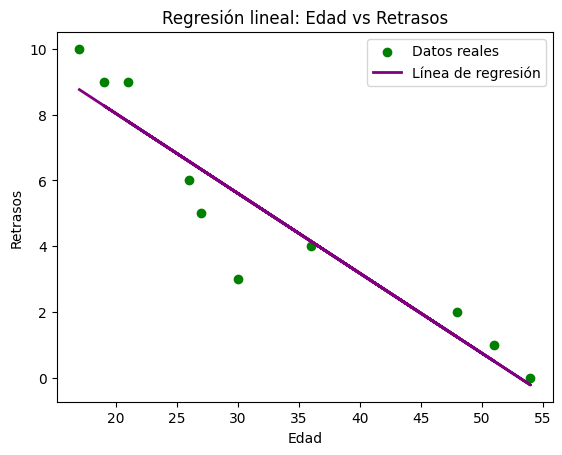

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = student_data[['Edad']]
y = student_data['Retrasos']

#modelo de regresión lineal
model = LinearRegression()


model.fit(X, y)

#predecir los valores de y usando el modelo ajustado
y_pred = model.predict(X)

#error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Coeficientes del modelo:", model.coef_)
print("Intersección del modelo:", model.intercept_)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


plt.scatter(X, y, color='green', label='Datos reales')
plt.plot(X, y_pred, color='purple', linewidth=2, label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Regresión lineal: Edad vs Retrasos')
plt.legend()
plt.show()


Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

El modelo de regresión lineal simple muestra una fuerte relación inversa entre la edad y el número de retrasos. La edad parece ser un buen predictor de los retrasos, dado que el modelo explica el 88.20% de la variabilidad en los retrasos. Sin embargo, es importante tener en cuenta que otros factores no considerados en este modelo pueden influir en los retrasos, y que un análisis más completo podría incluir variables adicionales para mejorar la precisión del modelo.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [7]:
vehicles = pd.read_csv("vehicles.csv")

In [8]:
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [9]:
vehicles_clean = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_x = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_y = vehicles[['CO2 Emission Grams/Mile']]

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

<Axes: >

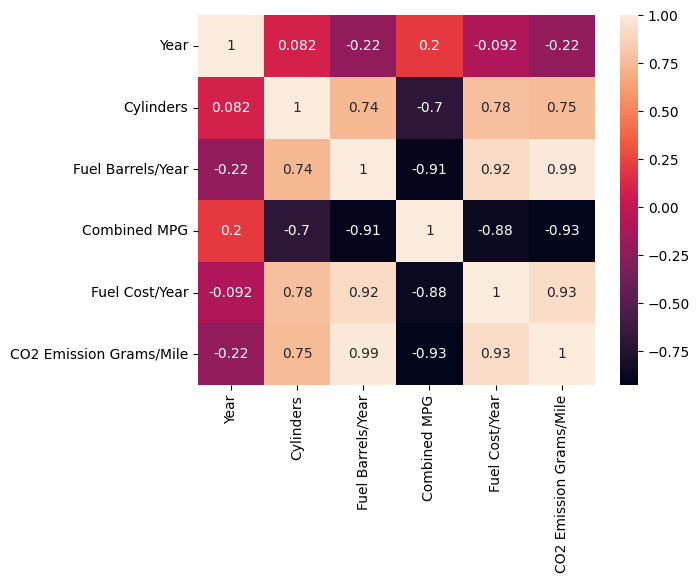

In [10]:
correlation_matrix = vehicles_clean.corr()

sns.heatmap(correlation_matrix, annot=True)

#segun las variables hay fuerte correlacion entre Cylinders, Fuel Barrels/Year, Combined MPG y Fuel Cost/Year

In [21]:
correlation_matrix = vehicles_clean.corr()
correlation_with_co2 = correlation_matrix['CO2 Emission Grams/Mile']
print(correlation_with_co2)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Las variables que serán las más importantes para determinar las emisiones de CO2 serán el coste de combustible/año y el MPG combinado porque son variables cuyos valores están más cerca de 1 (o -1). La variable Coste de combustible/año está más cerca de 1, y esta fuerte correlación positiva sugiere que los costes de combustible más altos están asociados con mayores emisiones de CO2, y las MPG combinadas están más cerca de -1, lo que puede sugerir que las MPG combinadas más altas están asociadas con emisiones de CO2 más bajas. .

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Error Cuadrático Medio (MSE): 299.1345306573877
Coeficiente de Determinación (R²): 0.9787945096326891
Intercepto: 126.54430661273648
Coeficientes: [ 0.97900802 19.80832588 -3.04643261  0.02907964]


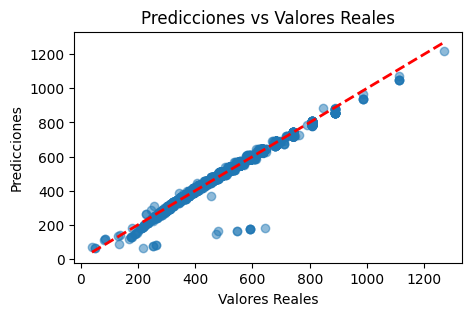

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('vehicles.csv')

# Seleccionar las variables predictoras y la variable objetivo
X = data[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
y = data['CO2 Emission Grams/Mile'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

# Obtener los coeficientes del modelo
coef = model.coef_
intercept = model.intercept_
print("Intercepto:", intercept)
print("Coeficientes:", coef)

# Crear el gráfico de dispersión
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()


Coeficiente de Determinación (R²): 0.8653
Esto sugiere que aproximadamente el 86.53% de la variabilidad en el costo anual de combustible puede ser explicada por las variables predictoras (Cylinders, Fuel Barrels/Year, Combined MPG). Es un valor bastante alto, lo que indica un buen ajuste del modelo.

El modelo de regresión lineal ajustado parece ser bastante bueno, dado el alto valor de R², lo que sugiere que las variables seleccionadas (Cylinders, Fuel Barrels/Year, Combined MPG) son buenos predictores del costo anual de combustible.
El Error Cuadrático Medio (MSE) proporciona una idea del error promedio en las predicciones, y aunque siempre se puede buscar mejorar el modelo, el actual muestra un rendimiento decente.
Las variables Cylinders y Fuel Barrels/Year tienen coeficientes positivos, lo que implica que incrementos en estas variables aumentan el costo de combustible. En contraste, Combined MPG tiene un coeficiente negativo, lo que implica que una mayor eficiencia de combustible reduce el costo de combustible.

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [24]:
import statsmodels.api as sm

import statsmodels.api as sm
est = sm.OLS(y, X) 
est = est.fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.604e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:15:16   Log-Likelihood:                     -1.5506e+05
No. Observations:               35952   AIC:                                  3.101e+05
Df Residuals:                   35948   BIC:                                  3.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Cylinders             1.1924      0.087     13.724      0.000       1.022       1.363
Fuel Barrels/Year    22.3819      0.052    433.251      0.000      22.281      22.483
Combined MPG          0.0899      0.010      9.047      0.000       0.070       0.109
Fuel Cost/Year        0.0381      0.001     75.435      0.000       0.037       0.039
==============================================================================
Omnibus:                    78952.446   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        463008735.365
Skew:                          20.238   Prob(JB):                         0.00
Kurtosis:                     557.478   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La variable más importante es barriles de combustible/Año, tiene la mayor correlación con las emisiones de CO2 y el coeficiente más alto en la regresión lineal es 19.05292507
En orden de coeficiente viene lo siguiente: cilindros, MPG combinado, y coste de combustible/año

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*